# LangChain and Google's Gemini

In [ ]:
pip install -q langchain-google-genai

In [ ]:
pip install --upgrade -q langchain-google-genai

In [ ]:
pip show langchain-google-genai

In [ ]:
pip install -q google-generativeai

In [1]:
# loading the API key form .env
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [2]:
# prompting the user for the API key if it wasn't loaded from .env
import getpass
import os
if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass.getpass('Provide your Google API Key: ')

In [3]:
# listing all available models
import google.generativeai as genai
for model in genai.list_models():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/aqa


## Integrating Gemini with LangChain

In [4]:
# Import the necessary class for interacting with Google's generative AI models
from langchain_google_genai import ChatGoogleGenerativeAI

# Create an instance of the LLM, using the 'gemini-pro' model and set creativity level
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0.9)  

# Send a prompt to the LLM, requesting a creative paragraph
response = llm.invoke('Write a paragraph about life on Mars in year 2100.') 

# Print the generated text from the LLM's response
print(response.content)  

In the bustling metropolis of New Mars City, beneath the shimmering domes that protect its inhabitants from the unforgiving Martian environment, life has taken on a futuristic rhythm. Advanced terraforming technology has transformed the once barren landscape into a verdant tapestry of vegetation, allowing for the cultivation of crops and the flourishing of plant life. Humans, clad in sleek spacesuits, navigate the Martian terrain in state-of-the-art vehicles, traversing vast canyons and exploring the intriguing geological formations. Habitation modules, marvels of human ingenuity, provide comfortable living spaces, equipped with the latest technology and amenities. The air is breathable, thanks to sophisticated systems that regulate the atmosphere, while fusion reactors generate abundant energy, powering the city's infrastructure. As the sun sets on the Martian horizon, casting long shadows across the cityscape, the lights of New Mars City illuminate the Martian night, a testament to h

In [5]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
llm = ChatGoogleGenerativeAI(model='gemini-pro')

prompt = PromptTemplate.from_template('You are a content creator. Write me a tweet about {topic}')

# Create a chain that will use the LLM and prompt 
chain = LLMChain(
    llm=llm,
    prompt=prompt,
    verbose=True
)

topic = 'Why will AI change the world'

# Execute the chain, providing the topic as input
response = chain.invoke(input=topic)
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
You are a content creator. Write me a tweet about Why will AI change the world

> Finished chain.
{'topic': 'Why will AI change the world', 'text': "#AIRevolution: AI's impact on the world is like a ripple effect, touching every corner of our lives. From automating tasks to enhancing decision-making, AI is transforming industries, healthcare, finance, transportation, and more. It holds the potential to solve complex problems, optimize processes, and create a future where technology and humanity coexist harmoniously. #ArtificialIntelligence #GameChanger"}


In [6]:
print(response['topic'])
print()
print(response['text'])

Why will AI change the world

#AIRevolution: AI's impact on the world is like a ripple effect, touching every corner of our lives. From automating tasks to enhancing decision-making, AI is transforming industries, healthcare, finance, transportation, and more. It holds the potential to solve complex problems, optimize processes, and create a future where technology and humanity coexist harmoniously. #ArtificialIntelligence #GameChanger


## System Prompt and Streaming

### System prompt

In [10]:
from langchain_core.messages import HumanMessage, SystemMessage
llm = ChatGoogleGenerativeAI(model='gemini-pro', convert_system_message_to_human=True)
output = llm.invoke(
    [
        SystemMessage(content='Answer only YES or NO in French.'),
        HumanMessage(content='Is fish a mammal?')
    ]
)
output.content

'NON'

### Streaming

In [8]:
llm = ChatGoogleGenerativeAI(model='gemini-pro', temperature=0)
prompt = 'Write a scientific paper outlining the mathematical foundation of our universe.'
response = llm.invoke(prompt)
print(response.content)

Title: Unveiling the Mathematical Underpinnings of Our Universe: A Comprehensive Exploration

Abstract:
The universe we inhabit is a vast and intricate tapestry of phenomena, governed by fundamental mathematical principles that shape its structure, dynamics, and evolution. This scientific paper delves into the mathematical foundation of our universe, exploring the intricate interplay between mathematics and physics that has led to our current understanding of the cosmos. We will investigate the mathematical frameworks that have revolutionized our comprehension of space, time, matter, and energy, highlighting the profound impact of mathematics in unraveling the mysteries of the universe.

1. Introduction:
The pursuit of understanding the universe's underlying principles has been a driving force in human intellectual history. From ancient civilizations' observations of celestial bodies to modern scientific advancements, mathematics has played a pivotal role in deciphering the language of

In [9]:
# enabling streaming
for chunk in llm.stream(prompt):
    print(chunk.content)
    print('-' * 100)
  

Title: Unveiling the Mathematical Underpinnings of Our Universe: A Comprehensive Exploration
----------------------------------------------------------------------------------------------------


Abstract:
The universe we inhabit is a vast and intricate tapestry of phenomena, governed by fundamental mathematical principles that shape its structure, dynamics, and evolution.
----------------------------------------------------------------------------------------------------
 This scientific paper delves into the mathematical foundation of our universe, exploring the intricate interplay between mathematics and physics that has led to our current understanding of the cosmos. We will investigate the mathematical frameworks that have revolutionized our comprehension of space, time, matter, and energy, highlighting the profound impact of mathematics in unraveling the
----------------------------------------------------------------------------------------------------
 mysteries of the universe

## Multimodal AI with Gemini Pro Vision

In [ ]:
pip install -q pillow

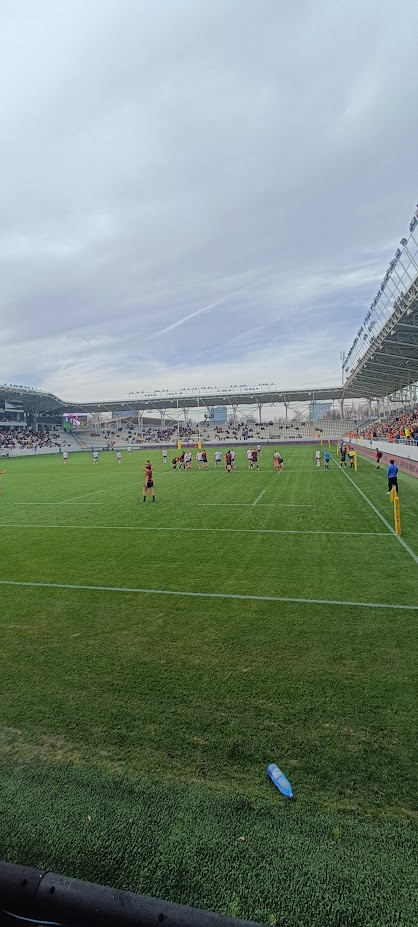

In [11]:
from PIL import Image
img = Image.open('match.jpg')
img

In [18]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True) 

# Create LLM instance, using a model specialized for images
llm = ChatGoogleGenerativeAI(model='gemini-pro-vision')  

# The question to ask about the image
prompt = 'What is in this image?' 

# Create a structured message combining text and image reference
message = HumanMessage(
  content=[
    {'type': 'text', 'text': prompt},  # Include the textual prompt
    {'type': 'image_url', 'image_url': img}  # Include a reference to the image (img variable holds the URL)
  ]
)  

# Send the message to the LLM for analysis
response = llm.invoke([message]) 
# Print the LLM's description of the image 
print(response.content)  

 A rugby match.


In [13]:
def ask_gemini(text, image, model='gemini-pro-vision'):
    llm = ChatGoogleGenerativeAI(model=model)
    message = HumanMessage(
        content=[
            {'type': 'text', 'text': text},
            {'type': 'image_url', 'image_url': image}
        ]
    )
    response = llm.invoke([message])
    return response
    

In [14]:
response = ask_gemini('What is this sport? How can I identify the sport in this picture?', img)
print(response.content)

 This is a rugby match. You can tell that this is rugby because there are no goal posts, the ball is being kicked by a player, and the players are wearing jerseys that have numbers on them.


In [15]:
response = ask_gemini('How many players can you identify in each team?', img)
print(response.content)

 There are 15 players in each team.


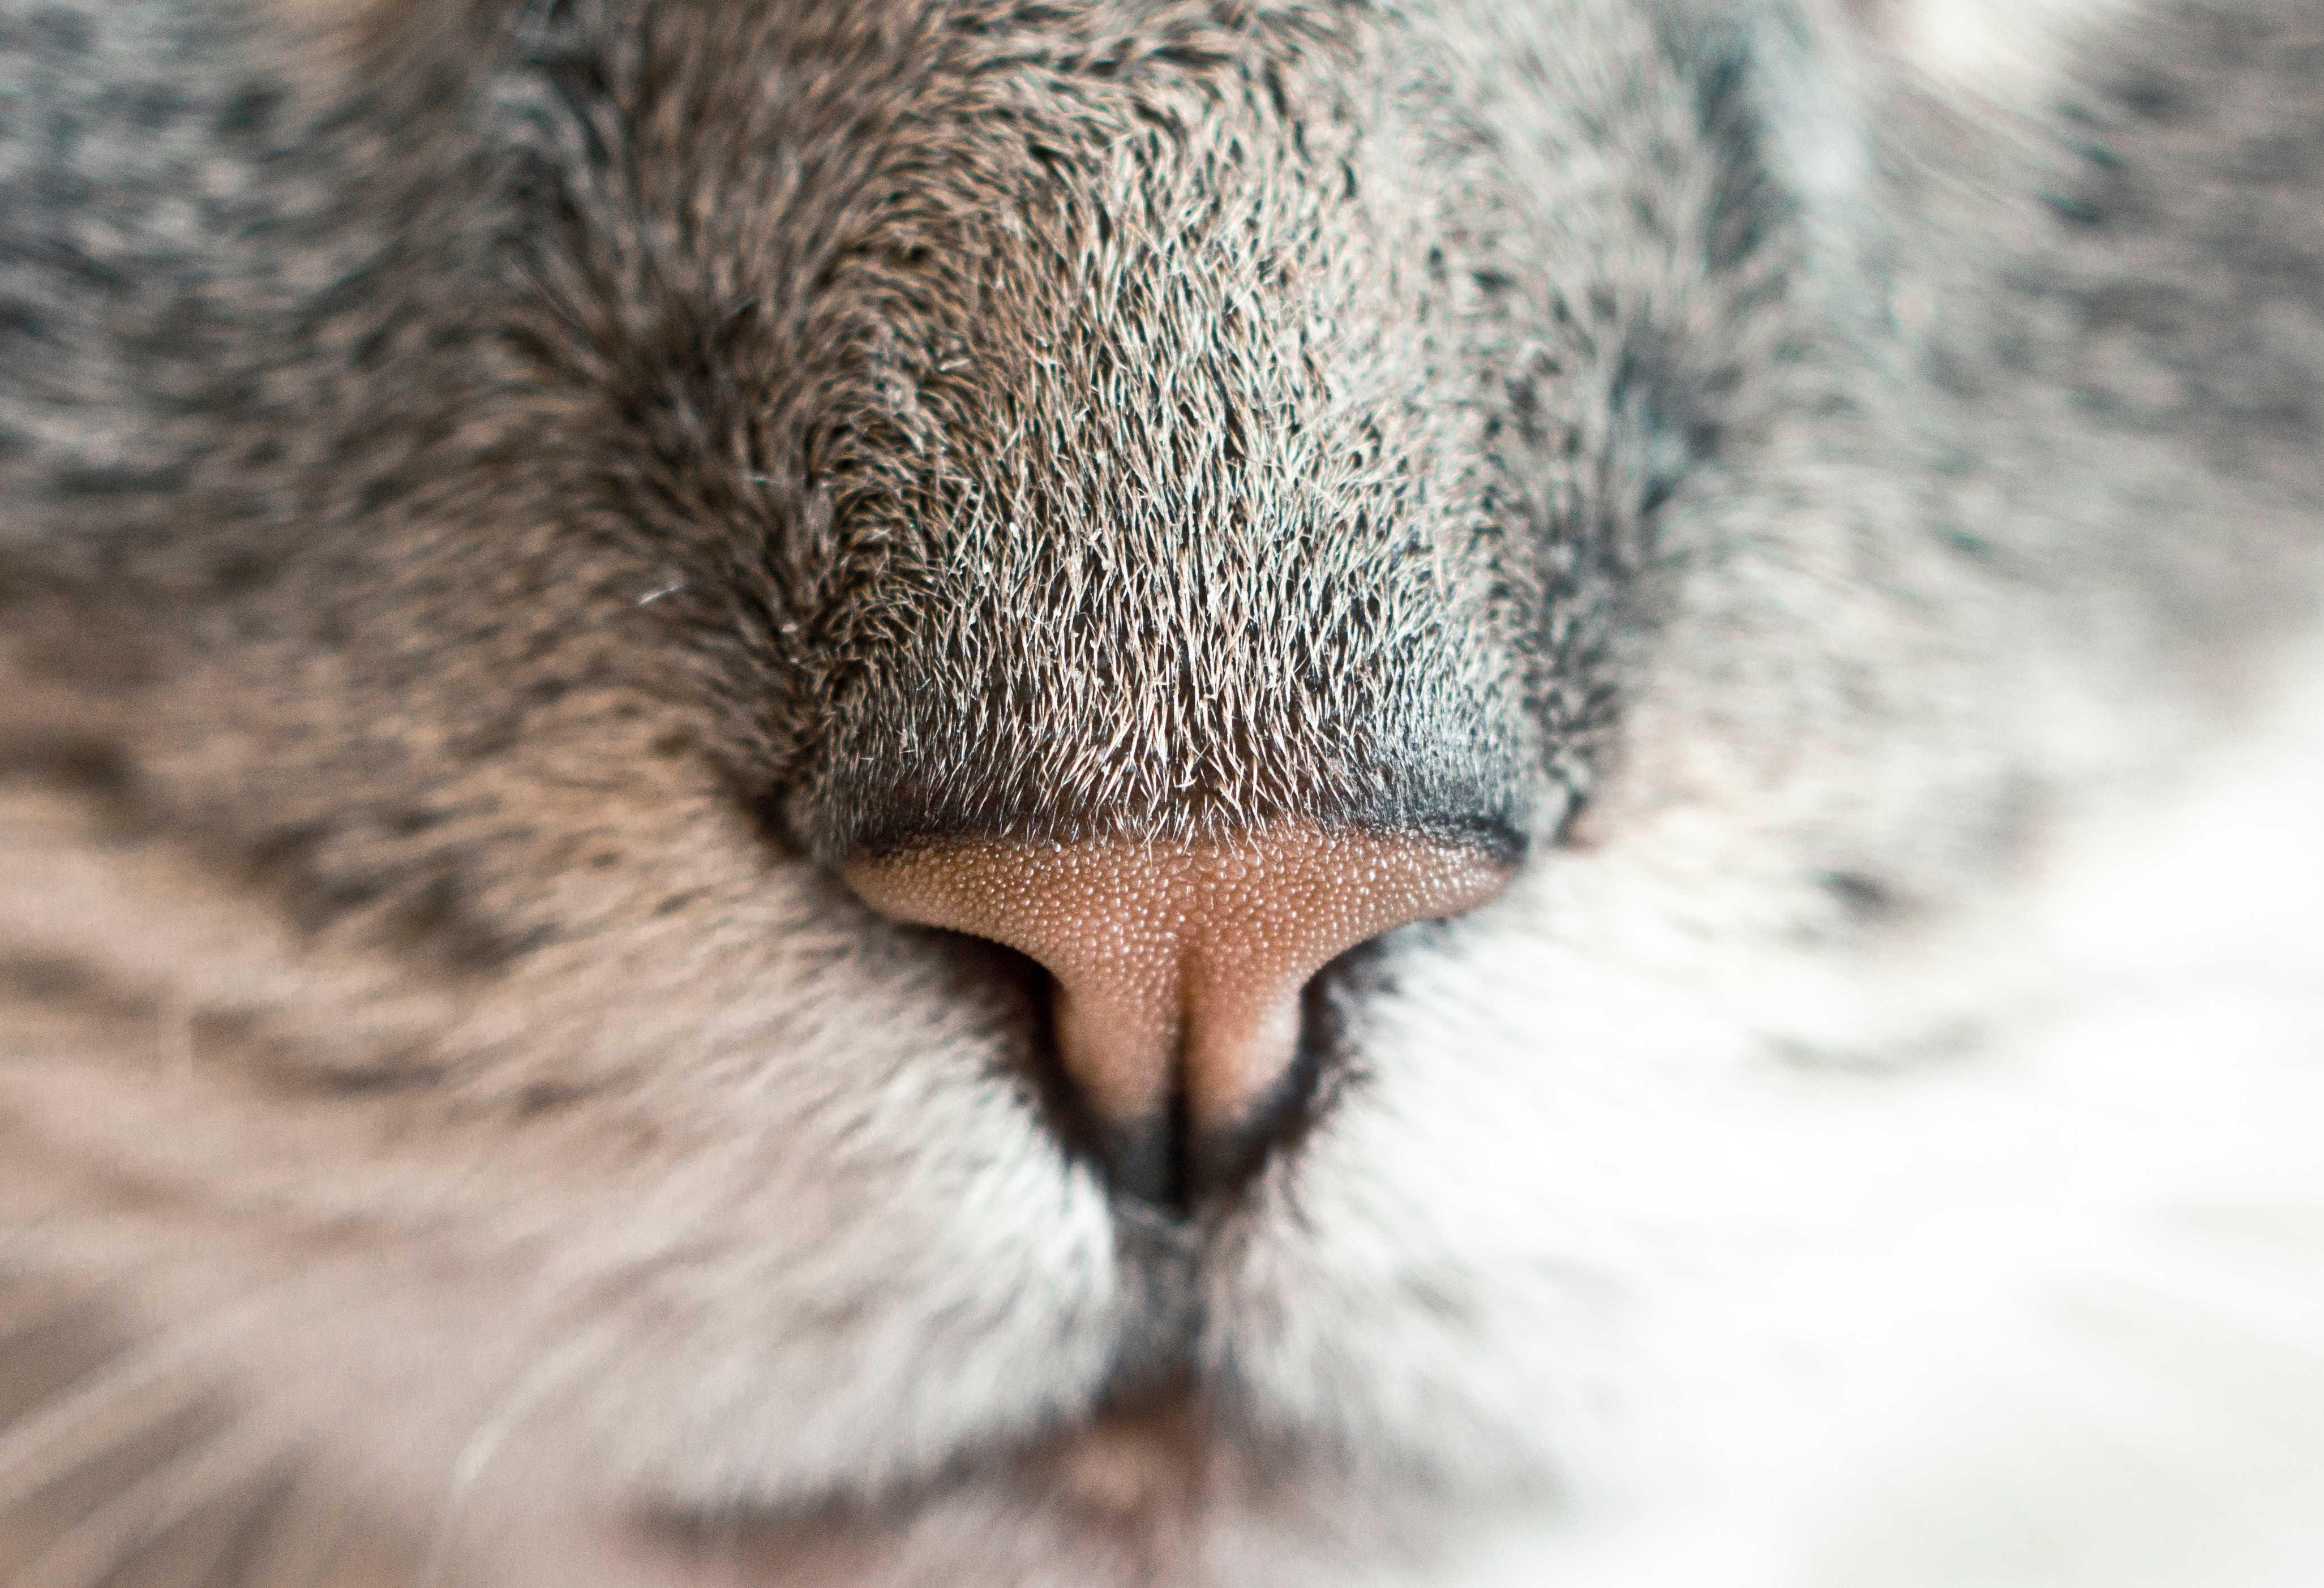

In [16]:
import requests
from IPython.display import Image
image_url = 'https://picsum.photos/id/40/4106/2806'
content = requests.get(image_url).content
image_data = Image(content)
image_data

In [17]:
response = ask_gemini('Describe this image as detailed as possible', image_url)
print(response)

content=" The image shows a close-up of a gray cat's nose. The nose is pink and has a black spot in the center. The fur around the nose is light gray and there are some longer, darker gray whiskers."
